## Intro

Once the text data is cleaned and tokenized it is ready for NLP analysis. Vectorization of the tokens allows data scientist to mathematically represent text as vectors. There are numerous ways to create these vectors.


+ compare between ML models with different feature representation (count vector, weigthed and unweighted embedding models)

+ single model (e.g., logistic regression with count vector representation), and compare the performance with different amount of info. 

+ Unweighted, you just sum the word embeddings of an job ad as the representation of an job ad. 

+ Weighted sum, ou can do a weighted sum of word embeddings as representation instead of just sum. 

You can do that for any embedding models and generate two version of doc representation

## bulid:

+ count vector representation
+ weigthed embedding representation (use TF-IDF as the weight when you do weighted sum of word embeddings)
+ unweigted embedding representation. 

## Question 
+ load pretrained model or train it from stractch

# Assignment 2: Milestone I Natural Language Processing

<h3 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Task 2&3.<br>Feature Representation & Classification</strong></h3>

#### Student Name: Tran Ngoc Anh Thu
#### Student ID: s3879312

Date: "October 2, 2022"

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used (please go to `requirements.txt` file for further details)
* sklearn
* collections
* re
* numpy
* nltk
* itertools
* pandas
* os
* pylab
* collections

## Introduction

Machine and Algorithm can not understand lossing categorical data. Therefore, we should encode those text into numerical values using feature representation
We have pre-processed data in Task1. Once the text data is cleaned and tokenized it is ready for NLP analysis. Vectorization of the tokens allows us to mathematically represent text as vectors. There are numerous ways to create these vectors.


+ compare between ML models with different feature representation (count vector, weigthed and unweighted embedding models)

+ single model (e.g., logistic regression with count vector representation), and compare the performance with different amount of info. 

+ Unweighted, you just sum the word embeddings of an job ad as the representation of an job ad. 

+ Weighted sum, ou can do a weighted sum of word embeddings as representation instead of just sum.

## Steps
+ 1.1. Examining and loading data

+ 1.2. Basic Text Pre-processing
    * 1.2.1. Extract information from each job advertisement. Perform the following pre-processing steps to the description of each job advertisement;
    * 1.2.2. Tokenize each job advertisement description. The word tokenization must use the following regular expression:
    ```python
    pattern = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?" 
    ```
    * 1.2.3. All the words must be converted into the lower case;
    * 1.2.4. Remove words with length less than 2.
    * 1.2.5. Remove stopwords using the provided stop words list (i.e, stopwords_en.txt). It is located inside the same downloaded folder.
    * 1.2.6. Remove the word that appears only once in the document collection, based on term frequency.
    * 1.2.7. Remove the top 50 most frequent words based on document frequency.
    * 1.2.8. Save all job advertisement text and information in txt file(s) 
    * 1.2.9. Build a vocabulary of the cleaned job advertisement descriptions, save it in a txt file (please refer to the required output)
    
+ 1.3. Summary
> * Discussion
      
+ 1.4. References


## Dataset
+ A small collection of job advertisement documents (around 776 jobs) inside the `data` folder.
+ Inside the data folder, there are four different sub-folders: Accounting_Finance, Engineering, Healthcare_Nursing, and Sales, representing a job category.
+ The job advertisement text documents of a particular category are in the corresponding sub-folder.
+ Each job advertisement document is a txt file named `Job_<ID>.txt`. It contains the title, the webindex (some will also have information on the company name, some might not), and the full description of the job advertisement.



In [62]:
from itertools import chain
from nltk.probability import *

# import code as a function
from src.utils import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warning
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# set desired matplotlib gloabal figure size
plt.rcParams["figure.figsize"] = (20,10)

## Importing libraries

In [2]:
# Read job_ad.csv
job_ad = pd.read_csv('job_ad.csv')

# # get the description of the job ad
# description = job_ad['Description']
# # get the tokenized description of the job ad
# tk_description = job_ad['Tokenized Description']
webindex = job_ad['Webindex']


# print first 3 rows
job_ad.head(3)

,Title,Webindex,Company,Description,Tokenized Description,Category
0,Finance / Accounts Asst Bromley to ****k,68997528,First Recruitment Services,Accountant (partqualified) to **** p.a. South ...,"['accountant', 'partqualified', 'south', 'east...",Accounting_Finance
1,Fund Accountant Hedge Fund,68063513,Austin Andrew Ltd,One of the leading Hedge Funds in London is cu...,"['leading', 'hedge', 'funds', 'london', 'recru...",Accounting_Finance
2,Deputy Home Manager,68700336,Caritas,An exciting opportunity has arisen to join an ...,"['exciting', 'opportunity', 'arisen', 'join', ...",Healthcare_Nursing


In [3]:
descriptionFile = './description.txt'
with open(descriptionFile) as f:
    tk_description = f.read().splitlines() # read all the descriptions into a list
    
print(len(tk_description))
type(tk_description)

776


list

#### Converting each description text string into list of tokens

In [4]:
tk_description = [description.split(" ") for description in tk_description] # note that we have to revert the join string into

# Explore the current statistics
stats_print(tk_description)

Vocabulary size:  5218
Total number of tokens:  102975
Lexical diversity:  0.05067249332362224
Total number of description: 776
Average description length: 132.69974226804123
Maximum description length: 471
Minimum description length: 12
Standard deviation of description length: 70.3782402519735


#### Reading the corresponding category labels

In [5]:
# read the category of the job ad
categoryFile = './category.txt'
with open(categoryFile) as f:
    category = f.read().splitlines() # read all the category into a list
    
print(len(category))
type(category)

776


list

#### Making sure we done it right
Take an example, e.g., the 10th element

In [6]:
print(f'The number of the category: {len(category)}')
print(f'The number of the description: {len(tk_description)}')
if len(category) == len(tk_description):
    print(f'The number of category of category and description are the same and corresponding to each other')

The number of the category: 776
The number of the description: 776
The number of category of category and description are the same and corresponding to each other


**Create temporary variable and assign a number for testing at that index**

`test_index` is a number to test whether the attribute at that position matches the desired outputs. So we don't need to print to whole lengthly output each test and void memory problems

In [7]:
test_index = 20

### ----------------> OBSERVATION

We can see the length of the description text and corresponding labels are equal.

In [8]:
test = job_ad[job_ad['Webindex'] == 71692209]
test

,Title,Webindex,Company,Description,Tokenized Description,Category
20,PERM Unit Mgr RGN Kid minster Flexi ****K due,71692209,NaN,Job Title: Unit Manager Reporting to: Register...,"['job', 'title', 'unit', 'manager', 'reporting...",Healthcare_Nursing


In [9]:
test['Description']

20    Job Title: Unit Manager Reporting to: Register...
Name: Description, dtype: object

Convert the loaded category labels to integers:

## Constructing the Vocabulary

Now, we complete all the basic pre-process step and we are ready to move to feature generation! &#129321;
Before we start, in this task, you are required to construct the final vocabulary, e.g., `vocab`:

In [10]:
# generating the vocabulary

words = list(chain.from_iterable(tk_description)) # we put all the tokens in the corpus in a single list
vocab = sorted(list(set(words))) # compute the vocabulary by converting the list of words/tokens to a set, i.e., giving a set of unique words

# total number of the vocabulary
len(vocab)

5218

In [ ]:
# # Text cleaning function for gensim fastText word embeddings in python
# def process_text(document):
     
#             # Remove extra white space from text
#         document = re.sub(r'\s+', ' ', document, flags=re.I)
         
#         # Remove all the special characters from text
#         document = re.sub(r'\W', ' ', str(document))
 
#         # Remove all single characters from text
#         document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
 
#         # Converting to Lowercase
#         document = document.lower()
 
#         # Word tokenization       
#         tokens = document.split()
#         # Lemmatization using NLTK
#         lemma_txt = [stemmer.lemmatize(word) for word in tokens]
#         # Remove stop words
#         lemma_no_stop_txt = [word for word in lemma_txt if word not in en_stop]
#         # Drop words 
#         tokens = [word for word in tokens if len(word) > 3]
                 
#         clean_txt = ' '.join(lemma_no_stop_txt)
 
#         return clean_txt



# clean_corpus = [process_text(sentence) for sentence in tqdm(some_sent) if sentence.strip() !='']
 
# word_tokenizer = nltk.WordPunctTokenizer()
# word_tokens = [word_tokenizer.tokenize(sent) for sent in tqdm(clean_corpus)]
# word_tokens

<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Task 2. Generating Feature Representations</strong></h3>

Generate different types of feature representations for the collection of the job advertisements. Note that in this task, we will only consider the description of the job advertisement. The feature representation that you need to generate includes the following:

* Bag-of-words model: Generate the Count vector representation for each job advertisement description, and save them into a file (please refer to the required output). Note, the generated Count vector representation must be based on the generated vocabulary in Task 1 (as saved in `vocab.txt`).

* Models based on word embeddings: You are required to generate feature representation of job advertisement description based on the following language models, respectively:
>> * Choose 1 embedding language model FastText
>> * Build the weighted (use TF-IDF as the weight when you do weighted sum of word embeddings) 
>> * Build the unweighted vector representation for each job advertisement description using the chosen language model.

So let's say we do binary feature representation but with 3 types of data, the title, the description, and title+description.

In [11]:
from collections import Counter

"""
Bag-of-words model:
Generate the Count vector representation for each job advertisement description, and save
them into a file (please refer to the required output). Note, the generated Count vector
representation must be based on the generated vocabulary in Task 1 (as saved in vocab.txt).
"""
# bag of words model
def bag_of_words(description, vocab):
    # create a list of 0s with the same length as the vocab
    bow = [0] * len(vocab)
    # count the number of times each word appears in the description
    word_counts = Counter(description)
    # update the bow list with the word counts
    for word, count in word_counts.items():
        bow[vocab.index(word)] = count
    return bow

# Generate the Count vector representation for each job advertisement description
bow = [bag_of_words(description, vocab) for description in tk_description]

## 2.1 Saving outputs
Save the count vector representation as per spectification.
- `count_vectors.txt`

`count_vectors.txt` stores the sparse count vector representation of job advertisement descriptions in the following format. Each line of this file corresponds to one advertisement. It starts with a ‘#’ key followed by the webindex of the job advertisement, and a comma ‘,’. The rest of the line is the sparse representation of the corresponding description in the form of word_integer_index:word_freq separated by comma. Following is an example of the file format.

In [12]:

# save count vector representation of job advertisement descriptions
with open('count_vectors.txt', 'w') as f:
    for i, description in enumerate(tk_description):
        f.write('#' + str(webindex[i]) + ',')
        for word in description:
            f.write(str(vocab.index(word)) + ':' + str(bow[i][vocab.index(word)]) + ',')
        f.write('\n')
    print("Successfully write count vector representation of job advertisement descriptions into count_vectors.txt file")


Successfully write count vector representation of job advertisement descriptions into count_vectors.txt file


## Building Vector Representation

After text pre-processing has been completed, each individual document needs to be transformed into 
some kind of numeric representation that can be input into most NLP and text mining algorithms.
For example, classification algorithms, such as Support Vector Machine, can only take data in a 
structured and numerical form. They do not accept free language text.
A popular structured representation of text is the vector-space model, which represents each text/article
as a vector where the elements of the vector indicate the occurence of words within the text.

The vector-space model makes an implicit assumption that 
the order of words in a text document are not as
important as words themselves, and thus disregarded.
This assumpiton is called [**Bag-of-words**](https://en.wikipedia.org/wiki/Bag-of-words_model).

Given a set of documents and a pre-defined list of words appearing 
in those documents (i.e. a vocabulary), we can compute a vector representation for each document.
This vector representation can take one of the following three forms:
* a binary representation, each entry is either `word:0` (the word does not appear in the document; or `word:1` (the word appears in the document). We call this **binary vector representation**. 
* an integer count, each entry is `word:count`, telling how many times a word appear in a document. We call this **count vector representation**. 
* and a float-valued weighted vector, each entry is `word:weight`, telling a **weighted representative importance** of a word to a document. One of the most common weighted vectors used in natural language processing is called the *tfidf* vector. 

Given the cleaned up BBC News articles, how can we generate those vectors for each document? 

Unfortunately, NLTK does not implement methods that directly produce those vectors.
Therefore, we will either write our own code to compute them or appeal to other data analysis libraries.

Here we are going to use [scikit-learn](http://scikit-learn.org/stable/index.html), an open source machine 
learning library for Python.
If you use Anaconda, you should already have scikit-learn installed, otherwise you will need to 
[install it](http://scikit-learn.org/stable/install.html) by following the instruction on its official website.

Although scikit-learn features various classification, regression and clustering algorithms
we are particularly interested in its feature extraction module, [sklearn.feature_extraction](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction).
This module is often used to "extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image." Please refer to its documentation on text feature extraction,
Section 6.2.3 of [Feature Extraction](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction). 

In the following, we will demonstrate the usage of the following two classes:
* [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer): It converts a collection of text documents to a matrix of token counts. 
* [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer):
It converts a collection of raw documents to a matrix of TF-IDF features.


### 5.3 Generating TF-IDF Vectors

Finally, we will generate the TF-IDF Vector to represent each of the document.

Similar to the use of `CountVector`, we first initialise a `TfidfVectorizer` object by only specifying the value of "analyzer" and the vocabulary, and then covert the BBC News articles into a list of strings, each of which corresponds
to a BBC News article.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tVectorizer = TfidfVectorizer(analyzer = "word",vocabulary = vocab) # initialised the TfidfVectorizer
tfidf_features = tVectorizer.fit_transform([' '.join(article) for article in tk_description]) # generate the tfidf vector representation for all articles
tfidf_features.shape

(776, 5218)

In [14]:
tfidf_features

<776x5218 sparse matrix of type '<class 'numpy.float64'>'
	with 75446 stored elements in Compressed Sparse Row format>

In [15]:
# # print out the weighted vector for the example document.
# validator(tfidf_features,vocab,test_ind, article_ids,article_txts,tk_description)

### 7.3 Saving the Vector Representation

Given the vocabulary, each document can be represented as a sequence of entries that correspond to the tokens, or in the following sparse form:
```
    word_index:word_count
```
where the `word_count` is either 0 or 1 or binary vector, and an integer value for count vector; or 
```
    word_index:weight
```
for the TF-IDF vector. 
In the following, we save the binary, count and tfidf vector representation of the documents, respectively. 
Each of the following block of codes loops through each document, and each token appears in the document (retrived by the index `f_ind`. 
As the data features is of the dimension of the size of the vocab, but there are only a limited number of words appear in a document, we retrieve the index of the non-zero entry of the data features by calling the `nonzero()` function:
* the [`nonzero()`](https://numpy.org/doc/stable/reference/generated/numpy.nonzero.html) function return the indices of the elements that are non-zero. These indices are returned as a tuple of arrays, one for each dimension of the matrix, containing the indices of the non-zero elements in that dimension. 

Note that here `data_features[a_ind]` returns a (1 x vocabSzie) sparse matrix of type '<class 'numpy.int64'>'. 
Therefore, the return from 
```python
binary_features[a_ind].nonzero()
```
is a tuple of two arrays, the first array (indexed 0) is the indices of non-zero elements in the row dimension, and the second array (indexed 1) is the indicies of the non-zero elements in the column dimension. 
Here we need to take the column dimension (indexed of a word in the vocabulary that appear in the document), therefore we take the 2nd array (retrieved by index 1). 
Note also that the element of the 1st array is always 0, as mentioned before, the dimension of the matrix is 1 times the size of vocabulary. 

For each word index that has a non-zero entry, one could then retrieve the feature value by indexing, for example:
```python
count_features[a_ind][0,f_ind]
```
this retrieves the frequency count of word (indexed `f_ind`) in the document `count_features[a_ind]`.

In [16]:
# Saving the Vector Representation
def write_vectorFile(data_features,filename):
    num = data_features.shape[0] # the number of document
    out_file = open(filename, 'w') # creates a txt file and open to save the vector representation
    for a_ind in range(0, num): # loop through each article by index
        for f_ind in data_features[a_ind].nonzero()[1]: # for each word index that has non-zero entry in the data_feature
            value = data_features[a_ind][0,f_ind] # retrieve the value of the entry from data_features
            out_file.write("{}:{} ".format(f_ind,value)) # write the entry to the file in the format of word_index:value
        out_file.write('\n') # start a new line after each article
    out_file.close() # close the file
    
tVector_file = "./jobAd_tVector.txt" # file name of the tfidf vector

write_vectorFile(tfidf_features,tVector_file) # write the tfidf vector to file
print(f'Successfully saved {tVector_file} into the directory')

Successfully saved ./jobAd_tVector.txt into the directory


### 7.4 Saving the Article IDs

Oh sorry, one last thing..... we should also save the article IDs accordingly, so that we can easily retrieve the labels of the article in downstream analysis. 

A very important note that the Article ID is different from the article index here. 
The Article ID is given from the original dataset, as an identifier of an article. 
The article index we were talking about in a couple of places in this Jupyter Notebook is related to how we read and preprocess the data. 
Remember, at the beginning, we have read all the articles into a list `article_txts`, so the index here refers to the index of the article in the list  `article_txts`. 

Indeed, in this example, since the article IDs are integers, we should have make this more consistent (just in case...). 
This could be simply done by setting an order when we read the articles. 
The following code that we use before to loop through each of the article .txt file
```python
for filename in os.listdir(dir_path):
``` 
can be changed to: 
```python
for filename in sorted(os.listdir(dir_path)):
``` 

as such, we visit the article txt files in a sorted order according to their filename. &#128578; We will leave this for you to try and experience the difference. 

Though, in many other context, we might not have that much luck with the file naming :) Therefore, we should always learn to save the indexing we used.

In [17]:
# dir_path = "./articles"
# article_ids = [] # list to store the article ID
# article_txts = [] # list to store the raw text

out_file = open("./webindex.txt", 'w') # creates a txt file named 'bbcNews_articleIDs.txt' to save the tfidf vector
for a_ind in range(0, len(tk_description)):
    out_file.write("{}\n".format(webindex[a_ind])) # write the article ID of each article
out_file.close() # close the file

<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Task 2. Generating Feature Representations</strong></h3>

So let's say we do binary feature representation but with 3 types of data, the title, the description, and title+description.

## Task 5. Generating Feature Vectors

In this task, we are going to generate feature vectors from tokenized review text. We are going to explore different feature vectors, including binary, count, and tf-idf vectors.

Binary, Count, TF-IDF

### Task 5.1 Generating Binary Vectors
In this subtask, let's start with generating the binary vector representation for each review.

We need to first import the `CountVectorizer` and initialise it.

In [18]:
# binding the words together for each review
joined_description = [' '.join(review) for review in tk_description]

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
bVectorizer = CountVectorizer(analyzer = "word",binary = True,vocabulary = vocab) # initialise the CountVectorizer

In [20]:
binary_features = bVectorizer.fit_transform(joined_description)
binary_features.shape

(776, 5218)

In [56]:
bVector_file = "saved_txt_files/BinaryVectors/jobAd_bVector.txt" # file name of the tfidf vector

write_vectorFile(binary_features,bVector_file) # write the tfidf vector to file
print(f'Successfully saved {bVector_file} into the directory')

Successfully saved saved_txt_files/BinaryVectors/jobAd_bVector.txt into the directory


### Generating Count Vectors

Each word coresponding to a feature

In [22]:
cVectorizer = CountVectorizer(analyzer = "word",vocabulary = vocab) # initialised the CountVectorizer
count_features = cVectorizer.fit_transform(joined_description)
count_features.shape

(776, 5218)

In [32]:
count_array = count_features.toarray()

# get_feature_names_out return the vocabulary of unique words
df = pd.DataFrame(data=count_array,columns = cVectorizer.get_feature_names_out())
df.sample(3)

,aap,aaron,aat,abb,abenefit,aberdeen,abi,abilities,ability,abreast,...,years,yeovil,yn,york,yorkshire,youmust,young,younger,yrs,zest
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
769,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
cVector_file = "saved_txt_files/CountVectors/jobAd_cVector.txt" # file name of the tfidf vector

write_vectorFile(count_features,cVector_file) # write the tfidf vector to file
print(f'Successfully saved {cVector_file} into the directory')

Successfully saved saved_txt_files/CountVectors/jobAd_cVector.txt into the directory


### Task 5.3 Generating TF-IDF Vectors


In this subtasks, you are required to generate the count vector features of review texts.



TF-IDF also gives larger values for less frequent words and is high when both IDF and TF values are high i.e the word is rare in all the documents combined but frequent in a single document.

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tVectorizer = TfidfVectorizer(analyzer = "word",vocabulary = vocab) # initialised the TfidfVectorizer
tfidf_features = tVectorizer.fit_transform(joined_description) # generate the tfidf vector representation for all articles
tfidf_features.shape

(776, 5218)

In [58]:
tVector_file = "saved_txt_files/TfidfVectors/jobAd_tVector.txt" # file name of the tfidf vector

write_vectorFile(tfidf_features,tVector_file) # write the tfidf vector to file
print(f'Successfully saved {tVector_file} into the directory')

Successfully saved saved_txt_files/TfidfVectors/jobAd_tVector.txt into the directory


## 4. Generating TF-IDF weighted document vectors

Ok, I hope you have lots of fun building document embeddings based on varoius word embedding models. 
Previously, when we generate the document embeddings, we just sum up the embeddings vector of each tokenized word in the article, a bit simplicity 🤔

In this section, let's make it a bit more challenging, we are going to build the tf-idf document embeddings. 
What does that mean? 🤨
Hmm~~ it's not magic, we just do a weigthed sum of the word embedding vectors, however, the weight here, refers to the tf-idf weight of the word. 

If you already forgot about what is `tf-idf`, please refer to Activity 3 Pre-processing Text and Generating Features. 
Otherwise, move on!
So we've generated the tf-idf vector representation of documents in Activity 3 and saved in a txt file called `bbcNews_tVector.txt`. The format of this file is:
- each line represents an article;
- each line is of the format 'w_index:weight w_index:weight ......' 

Oh, but we don't have that word index `w_index` here in this activity, what should we do? 🤔
ah ha, we also saved the vocabulary in a file `bbcNews_voc`, in which each line is a word, and of the format `index,word`. 
Theresore, based on these two files, we can create a word:weight mapping for each tokenized word in a document!

Ok, in the following couple block of codes, this is exactly what we are trying to do, step by step. 
- the `gen_vocIndex` function reads the the vocabulary file, and create an w_index:word dictionary


Term frequency (TF): number of times a term has appeared in a document.

The term frequency is a measure of how frequently or how common a word is for a given sentence.

Inverse Document Frequency (IDF):

The inverse document frequency (IDF ) is a measure of how rare a word is in a document. Words like “the”,” a” show up in all the documents but rare words will not occur in all the documents of the corpus.

If a word appears in almost every document means it’s not significant for the classification.

In [ ]:
def read_vocab(vocab_file):
    vocab = {}
    with open(vocab_file) as f:
        for line in f:
            (word, index) = line.split(':')
            vocab[word.strip()] = int(index)
    return vocab

# Generates the w_index:word dictionary
voc_fname = 'vocab.txt'
voc_dict = read_vocab(voc_fname)
voc_dict

### --------> OBSERVATION

- the `doc_wordweights` function takes the tfidf document vector file, as well as the `word_string:word_integer_index` dictionary, creates the mapping between word_integer_index and the actual word, and creates a dictionary of word:weight or each unique word appear in the document.

In [ ]:
def doc_wordweights(fName_tVectors, voc_dict):
    tfidf_weights = [] # a list to store the  word:weight dictionaries of documents
    
    with open(fName_tVectors) as tVecf: 
        tVectors = tVecf.read().splitlines() # each line is a tfidf vector representation of a document in string format 'word_index:weight word_index:weight .......'
    for tv in tVectors: # for each tfidf document vector
        tv = tv.strip()
        weights = tv.split(' ') # list of 'word_index:weight' entries
        weights = [w.split(':') for w in weights] # change the format of weight to a list of '[word_index,weight]' entries
        wordweight_dict = {voc_dict[int(w[0])]:w[1] for w in weights} # construct the weight dictionary, where each entry is 'word:weight'
        tfidf_weights.append(wordweight_dict) 
    return tfidf_weights

fName_tVectors = 'jobAd_tVector.txt'
tfidf_weights = doc_wordweights(fName_tVectors, voc_dict)

# take a look at the tfidf word weights dictionary of the first document
tfidf_weights[0]

### ------------------> OBSERVATION:

Ok, once we have the word:weight dictionary of each document, now we can construct the tf-idf weighted document embeddings. 
* the following `gen_docVecs` function is an revision/extension of the previous written function, that takes the word embeddings dictionary, the tokenized text of articles, and the tfidf weights (list of word:weight dictionaries, one for each article) as arguments, and generates the document embeddings:
 1. creates an empty dataframe `docs_vectors` to store the document embeddings of articles
  2. it loop through every tokenized text:
    - creates an empty dataframe `temp` to store all the word embeddings of the article
    - for each word that exists in the word embeddings dictionary/keyedvectors, 
        - if the argument `tfidf` weights are empty `[]`, it sets the weight of the word as 1
        - otherwise, retrieve the weight of the word from the corresponding word:weight dictionary of the article from  `tfidf`
    - row bind the weighted word embedding to `temp`
    - takes the sum of each column to create the document vector, i.e., the embedding of an article
    - append the created document vector to the list of document vectors

In [ ]:
# Generated the weighted version of the document embedding vectors first
weighted_bbcFT_dvs = gen_docVecs(bbcFT_wv,df['tk_description'],tfidf_weights)

And we can do very much the same thing as what we do before for other models. 
Here, we will do this as loops, for each model:
- we plot out the feature vectors  projected in a 2-dimensional space,then 
- we build the logistic regression model for document classfication and report the model performance.

In [ ]:
%matplotlib inline
seed = 0
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

models = [weighted_preTW2v_dvs,weighted_preTGloVe_dvs,weighted_bbcW2v_dvs,weighted_bbcFT_dvs]
model_names = ["Weighted Pretrained Word2Vec", "Weighted Pretrained GloVe", "Weighted In-house Word2Vec","Weighted In-house FastText"]
for i in range(0,len(models)): #loop through each model
    dv = models[i]
    name = model_names[i]
    features = dv.to_numpy() # convert the dataframe stored features to an numpy array
    print(name + ": tSNE 2 dimensional projected Feature space")
    plotTSNE(df['Category'],features)
    
    # creating training and test split
    X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(dv, df['Category'], list(range(0,len(df))),test_size=0.33, random_state=seed)

    model = LogisticRegression(max_iter = 2000,random_state=seed)
    model.fit(X_train, y_train)
    print("Accuracy: ", model.score(X_test, y_test))
    print('\n\n')

# OR

#### Note: Creating tfidf weighted document embeddings using Gensim

In the previous sections, we tried very hard to create the tfidf weighted document embeddings using the generated tf-idf weights save in previous activity. 
Indeed, we can using Genism to do this direction, and it's indeed, a bit less effor required 😑 Will show you below. 
We will use the in-house build Word2Vec model as an example.

In [ ]:
job_ad.columns

In [ ]:
from gensim.corpora import Dictionary
from gensim.models.tfidfmodel import TfidfModel

# we have two vocabularies here, one from the in-house bulit Word2Vec, the other from the articles 
# note that althought the Word2Vec is built on the same dataset, but they might have done further 
# pre-processing during model build (e.g., setting min_count), and thus, might create mismatch in the two vocabularis. 
# therefore, we remove tokenized words that doesn't exist in the keyedvectors in the Word2Vec keyedvectors
processed_text = [[w for w in t if w in bbcFT_wv.index_to_key] for t in job_ad['Tokenized Description']] 

# use the Gensim package to create a dictionary that encapsulates the mapping between normalized words and their integer ids.
docs_dict = Dictionary(processed_text) # creates a dictionary from the text
docs_dict.filter_extremes(no_below=5) # filtering words that appear less than 5 times
docs_dict.compactify() # assign new word ids to all words, shrinking any gaps.

In [ ]:
# see what are the words that been get rid off when we do the fliter
[w for w in bbcFT_wv.index_to_key if w not in docs_dict.values()]

In [ ]:
len(docs_dict.keys())

In [ ]:
import numpy as np
from gensim.matutils import sparse2full

docs_corpus = [docs_dict.doc2bow(doc) for doc in job_ad['Tokenized Description']] # convert corpus to Bag of Word format
model_tfidf = TfidfModel(docs_corpus, id2word=docs_dict) # fit the tfidf model
# apply model to the list of corpus document, 
# so each document is a list of tuples, (word_index, weight) for each word appears in the document
docs_tfidf  = model_tfidf[docs_corpus]

# see for example, the tfidf weights of the words in the 2nd document
docs_tfidf[1]

In [ ]:
# Weighted sum, ou can do a weighted sum of word embeddings as representation instead of just sum.
def create_weighted_embedding_models(X):
    global weighted_features
    weighted_features = []
    for i in range(len(X)):
        weighted_features.append(np.average(embedding_matrix[X[i]], axis=0, weights=weights[i]))


# create logistic regression with unweighted embedding representation
def create_unweighted_embedding_models(X):
    global unweighted_features
    unweighted_features = []
    for i in range(len(X)):
        unweighted_features.append(np.sum(embedding_matrix[X[i]], axis=0))

In [ ]:
# extended version of the `gen_docVecs` function
def gen_docVecs(wv,tk_txts,tfidf = []): # generate vector representation for documents
    docs_vectors = pd.DataFrame() # creating empty final dataframe
    #stopwords = nltk.corpus.stopwords.words('english') # removing stop words

    for i in range(0,len(tk_txts)):
        tokens = list(set(tk_txts[i])) # get the list of distinct words of the document

        temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
        for w_ind in range(0, len(tokens)): # looping through each word of a single document and spliting through space
            try:
                word = tokens[w_ind]
                word_vec = wv[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
                
                if tfidf != []:
                    word_weight = float(tfidf[i][word])
                else:
                    word_weight = 1
                temp = temp.concat(pd.Series(word_vec*word_weight), ignore_index = True) # if word is present then append it to temporary dataframe
            except:
                pass
        doc_vector = temp.sum() # take the sum of each column(w0, w1, w2,........w300)
        docs_vectors = docs_vectors.concat(doc_vector, ignore_index = True) # append each document value to the final dataframe
    return docs_vectors

In [ ]:
# save count vector representation of job advertisement descriptions
with open('count_vectors.txt', 'w') as f:
    for i, description in enumerate(tk_description):
        f.write('#' + str(webindex[i]) + ',')
        for word in description:
            f.write(str(vocab.index(word)) + ':' + str(bow[i][vocab.index(word)]) + ',')
        f.write('\n')
    print("Successfully write count vector representation of job advertisement descriptions into count_vectors.txt file")

## Task 6. Training Logistic Regression Models for label Classification

In this final task, you are required to bulid logistic regression models based on different feature vectors (binary, count and tfidf vectors), explore the cases where the model produced false predictions, and evaluate the performance of the model using a 5-fold cross-validation.

In the following, we first uses count vector features as an example to bulid a logistic regression model and  explore the preformance of the model:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

seed = 3879312
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(count_features, category, list(range(0,len(category))),test_size=0.2, random_state=seed)

max_iter = 1000 # this is a relative harder problem and we have to increase the maximum iteration parameter of the logistic regression model.

model = LogisticRegression(random_state=seed,max_iter=max_iter, multi_class='multinomial') # initial a logistic regression model
model.fit(X_train, y_train) # fit the model
model.score(X_test, y_test) # calculated the accuracy score on the test data

Looking at the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

In [ ]:
categories = ['Accounting_Finance', 'Engineering', 'Healthcare_Nursing', 'Sales'] # this gives sorted set of unique label names

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categories, yticklabels=categories, cmap="PiYG") # creates a heatmap from the confusion matrix
plt.ylabel('Actual')
plt.xlabel('Predicted')

Let's explore some mis-classified examples.

In [ ]:
import random

y_pred_prob = model.predict_proba(X_test) # instead of getting the direct prediction, i.e., a label, we can also get the probability distributions of labels

for p_ind in range(0, 2):
    for a_ind in range(0, 2):
        if p_ind !=  a_ind: # when it mis-classifies
            print("'{}' predicted as '{}' : {} examples.".format(categories[a_ind], categories[p_ind],\
                                                                 conf_mat[a_ind, p_ind]))
            print("====================================================")

            # retrieve the indices for the mis-classification
            mis_inds = [test_indices[i] for i in range(0,len(y_test)) if \
                        y_pred[i] == p_ind and y_test[i] == a_ind]
            #print out the article ID and the tokenised text content of the mis-classified examples
            for ind in random.sample(mis_inds,2): # explore 2 examples
                print("------------------------------------------------")
                print(joined_description[ind])
                print("-----------------------------------------------\n")
            print()

### 5-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
num_folds = 5
kf = KFold(n_splits= num_folds, random_state=seed, shuffle = True) # initialise a 5 fold validation
print(kf)

In [ ]:
def evaluate(X_train,X_test,y_train, y_test,seed):
    model = LogisticRegression(random_state=seed,max_iter = 1000)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

num_models = 3
cv_df = pd.DataFrame(columns = ['binary','count','tfidf'],index=range(num_folds)) # creates a dataframe to store the accuracy scores in all the folds

fold = 0
for train_index, test_index in kf.split(list(range(0,len(category)))):
    y_train = [str(category[i]) for i in train_index]
    y_test = [str(category[i]) for i in test_index]

    X_train_binary, X_test_binary = binary_features[train_index], binary_features[test_index]
    cv_df.loc[fold,'binary'] = evaluate(binary_features[train_index],binary_features[test_index],y_train,y_test,seed)

    X_train_count, X_test_count = count_features[train_index], count_features[test_index]
    cv_df.loc[fold,'count'] = evaluate(count_features[train_index],count_features[test_index],y_train,y_test,seed)

    X_train_tfidf, X_test_tfidf = tfidf_features[train_index], tfidf_features[test_index]
    cv_df.loc[fold,'tfidf'] = evaluate(tfidf_features[train_index],tfidf_features[test_index],y_train,y_test,seed)

    fold +=1

Printing the result of each fold for each vector representation:

In [ ]:
cv_df

In [ ]:
cv_df.mean()

<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Task 3. Job Advertisement Classification</strong></h3>

...... Sections and code blocks on buidling classification models based on different document feature represetations. 
Detailed comparsions and evaluations on different models to answer each question as per specification. 

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

## 3. FastText model trained on BBC News data 

trained our `Word2Vec` and `FastText` models using our BBC News dataset

## 3. FastText

As mentioned before, `word2vec` model does not accommodate words that do not appear in the training corpus. 

Here, we’ll learn to work with the fastText library for training word-embedding models, and performing similarity operations & vector lookups analogous to Word2Vec. 

In the following block of code, we import the `FastText` model form Gensim library, then:
1. We set the path to the corpus file. Similar as above, we use the Bbc News article as the training corpus;
2. Initialise the `FastText` model, similar as before, we use 100 dimention vectors;
3. Then we build the vocabulary from the copurs;
4. Finally, we train the fasttext model based on the corpus.

Finally, we experiment the FastText embeddings. 
Similar, we:
* load the FastText model saved in our prevoius activity;
* generate document embeddings based on the load FastText word embeddings;
* explore the reprensentiveness of the features through tSNE;
* bulid the logistic regression model based on the generated document embeddings for news classfication.

T. Mikolov, E. Grave, P. Bojanowski, C. Puhrsch, A. Joulin. Advances in Pre-Training Distributed Word Representations


There are multiple pre-trained models in Gensim, see Section **Pretrained models** in https://radimrehurek.com/gensim/models/word2vec.html.

In [ ]:
# from gensim.models.fasttext import FastText

# # 1. Set the corpus file names/path
# corpus_file = './bbcNews.txt'

# # 2. Initialise the Fast Text model
# bbcFT = FastText(vector_size=100) 

# # 3. build the vocabulary
# bbcFT.build_vocab(corpus_file=corpus_file)

# # 4. train the model
# bbcFT.train(
#     corpus_file=corpus_file, epochs=bbcFT.epochs,
#     total_examples=bbcFT.corpus_count, total_words=bbcFT.corpus_total_words,
# )

# print(bbcFT)

In [ ]:
# # We can retrieve the KeyedVectors from the model as follows,

# bbcFT_wv = bbcFT.wv
# print(bbcFT_wv)

In [ ]:
# # Save the model
# bbcFT.save("bbcFT.model")

In [ ]:
# loading the trained Fasttext model based on bbc News data
from gensim.models.fasttext import FastText
bbcFT = FastText.load("bbcFT.model")
print(bbcFT)
bbcFT_wv= bbcFT.wv

In [ ]:
job_ad.columns

In [ ]:
# NOTE this can take some time to finish running
# generate document embeddings
bbcFT_dvs = gen_docVecs(bbcFT_wv,job_ad['Tokenized Description'])
bbcFT_dvs.isna().any().sum()

In [ ]:
bbcFT_dvs

### ----------> OBSERVATION

0 null record

### 1.1 Understand your task by tSNE

Alright! so we have the document embedding vector representation for each article now, we can proceed to the task of document classification. 
Before, we move on, a good habbit is to explore and understand how difficult the task is, whether there are too much noise in the data, making it impossible to clearly separate each category. 

One way to confirm that the feature space we are using is representative enough for our task (classifying articles into separate labels) to be solvable is to use dimensionality-reduction techniques: These methods project a high-dimensional vector into a lower number of dimensions, with different guarantees on this projection according to the method used. 
In this activity, we will use [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), a popular dimensionality reduction technique used in many fields, including NLP.

Since we will do the same thing again and again when we try other embeddings, we will construct a function to do this again.
The following function `plotTSNE` takes the following arugments:
* labels, the lable/category of each article
* features, a numpy array of document embeddings, each for an article.

and projects the feature/document embedding vectors in a 2 dimension space and plot them out. 
It does the following:
1. get the set of classes, called `categories` (5 categories)
2. sample 30% of the data/document embeddings randomly, and record the indices selected
3. project the selected document embeddings in 2 dimensional space using tSNE, each document embedding now corresponds to a 2 dimensional vector in `projected_features`
4. plot them out as scatter plot and highlight different categories in different color

In [51]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
def plotTSNE(labels,features): # features as a numpy array, each element of the array is the document embedding of an article
    categories = sorted(labels.unique())
    # Sampling a subset of our dataset because t-SNE is computationally expensive
    SAMPLE_SIZE = int(len(features) * 0.3)
    np.random.seed(0)
    indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
    projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
    colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']
    for i in range(0,len(categories)):
        points = projected_features[(labels[indices] == categories[i])]
        plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=categories[i])
    plt.title("Feature vector for each article, projected on 2 dimensions.",
              fontdict=dict(fontsize=15))
    plt.legend()
    plt.show()
    
# # explore feature space
# features = bbcFT_dvs.to_numpy() # convert the document vector dataframe to a numpy array
# plotTSNE(job_ad['Category'],features) # plot the tSNE to have a look

In [ ]:
# build the classfication model and report results
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(bbcFT_dvs, job_ad['Category'], list(range(0,len(job_ad))),test_size=0.33, random_state=seed)

model = LogisticRegression(max_iter = 1000,random_state=seed)
model.fit(X_train, y_train)
model.score(X_test, y_test)

# FasText

astText does significantly better on syntactic tasks as compared to the original Word2Vec, especially when the size of the training corpus is small. Word2Vec slightly outperforms fastText on semantic tasks though. - https://radimrehurek.com/gensim/auto_examples/tutorials/run_fasttext.html#sphx-glr-auto-examples-tutorials-run-fasttext-py

In [42]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [38]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
 
import nltk
en_stop = set(nltk.corpus.stopwords.words('english'))
 
from gensim.models.fasttext import FastText
 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
 
# Lemmatization
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()

In [43]:
# Defining values for parameters
embedding_size = 300
window_size = 5
min_word = 5
down_sampling = 1e-2
 
%time
fast_Text_model = FastText(tk_description,
                      vector_size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      workers = 4,
                      sg=1,
                      epochs=100)


2022-10-02 11:46:02,437 : INFO : collecting all words and their counts
2022-10-02 11:46:02,438 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-10-02 11:46:02,460 : INFO : collected 5218 word types from a corpus of 102975 raw words and 776 sentences
2022-10-02 11:46:02,460 : INFO : Creating a fresh vocabulary
2022-10-02 11:46:02,471 : INFO : FastText lifecycle event {'msg': 'effective_min_count=5 retains 2791 unique words (53.487926408585665%% of original 5218, drops 2427)', 'datetime': '2022-10-02T11:46:02.471426', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  5 2022, 01:53:17) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2022-10-02 11:46:02,472 : INFO : FastText lifecycle event {'msg': 'effective_min_count=5 leaves 96494 word corpus (93.70623937848993%% of original 102975, drops 6481)', 'datetime': '2022-10-02T11:46:02.472232', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  5 2022, 01:53:17) \n[Clang 12

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 16.2 µs


2022-10-02 11:46:06,455 : INFO : FastText lifecycle event {'update': False, 'trim_rule': 'None', 'datetime': '2022-10-02T11:46:06.455646', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  5 2022, 01:53:17) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'build_vocab'}
2022-10-02 11:46:06,456 : INFO : FastText lifecycle event {'msg': 'training model with 4 workers on 2791 vocabulary and 300 features, using sg=1 hs=0 sample=0.01 negative=5 window=5 shrink_windows=True', 'datetime': '2022-10-02T11:46:06.456922', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  5 2022, 01:53:17) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2022-10-02 11:46:07,175 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-02 11:46:07,263 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-02 11:46:07,397 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-02 11:46:07,399 : INFO : wor

In [ ]:
# NOTE this can take some time to finish running
# generate document embeddings
bbcFT_wv= fast_Text_model.wv
bbcFT_dvs = gen_docVecs_weight(bbcFT_wv,job_ad['Tokenized Description'])
bbcFT_dvs.isna().any().sum()

In [ ]:
# explore feature space
features = bbcFT_dvs.to_numpy()
plotTSNE(job_ad['Category'],features)

In [ ]:
# build the classfication model and report results
seed = 3879312
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(bbcFT_dvs, job_ad['Category'], list(range(0,len(job_ad))),test_size=0.33, random_state=seed)

model = LogisticRegression(max_iter = 1000,random_state=seed)
model.fit(X_train, y_train)
model.score(X_test, y_test)

## Save & Load Gensim FastText word embeddings Python model

In [47]:
from gensim.models import Word2Vec

fast_text_model_file = 'fast_text_model'

# Save fastText gensim model
fast_Text_model.save("models/FastText/fast_Text_model")
print(f'Successfully loaded {fast_text_model_file}')

# Load saved gensim fastText model
fast_Text_model = Word2Vec.load("models/FastText/fast_Text_model")

2022-10-02 11:55:21,878 : INFO : FastText lifecycle event {'fname_or_handle': 'models/FastText/fast_Text_model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2022-10-02T11:55:21.877997', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  5 2022, 01:53:17) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'saving'}
2022-10-02 11:55:21,880 : INFO : storing np array 'vectors_ngrams' to models/FastText/fast_Text_model.wv.vectors_ngrams.npy
2022-10-02 11:56:03,717 : INFO : not storing attribute buckets_word
2022-10-02 11:56:03,718 : INFO : not storing attribute vectors
2022-10-02 11:56:03,718 : INFO : not storing attribute cum_table
2022-10-02 11:56:03,730 : INFO : saved models/FastText/fast_Text_model
2022-10-02 11:56:03,731 : INFO : loading Word2Vec object from models/FastText/fast_Text_model
2022-10-02 11:56:03,733 : INFO : loading wv recursively from models/FastText/fast_Text_model.wv.* with mmap=None
2022-10-02 11:56:03,734 : IN

Successfully loaded fast_text_model


2022-10-02 11:56:07,251 : INFO : setting ignored attribute buckets_word to None
2022-10-02 11:56:07,254 : INFO : setting ignored attribute vectors to None
2022-10-02 11:56:07,503 : INFO : setting ignored attribute cum_table to None
2022-10-02 11:56:07,527 : INFO : FastText lifecycle event {'fname': 'models/FastText/fast_Text_model', 'datetime': '2022-10-02T11:56:07.527193', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  5 2022, 01:53:17) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'loaded'}


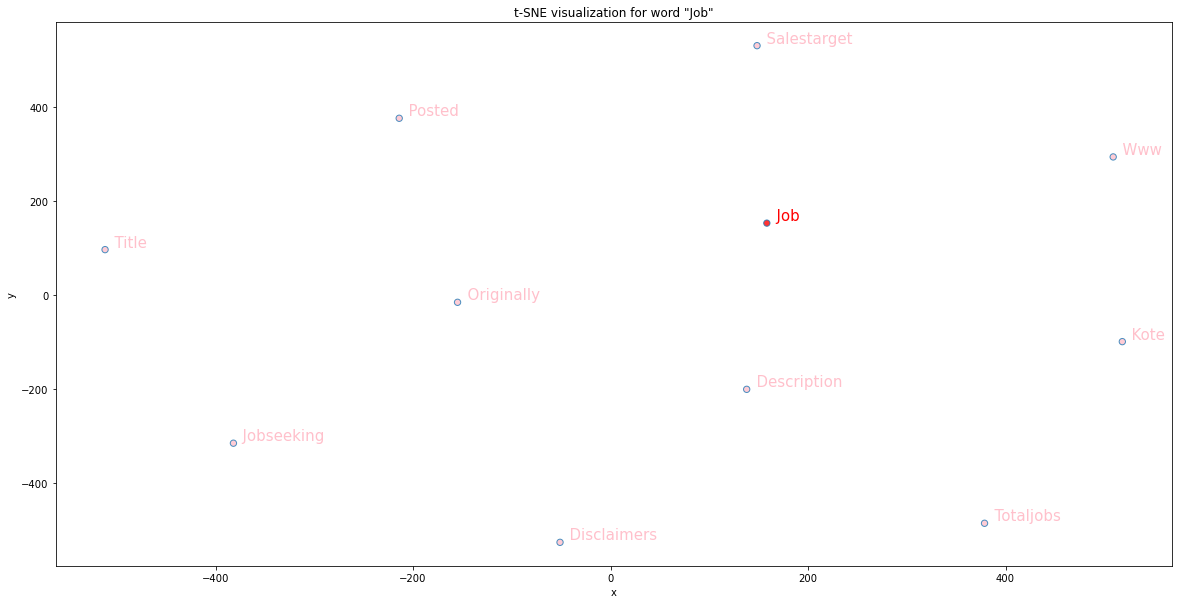

In [65]:
tsne_plot_word('job', fast_Text_model)

In [ ]:
import os

# The .py format of the jupyter notebook
for fname in os.listdir():
    if fname.endswith('ipynb'):
        os.system(f'jupyter nbconvert {fname} --to python')

<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Summary</strong></h3>

+ there are 3 different types of feature representation of documents that you need to
build in this task, including count vector, two document embeddings (one TF-IDF weighted, and one
unweighted version).

+ Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.
Bag of Words vectors are easy to interpret. However, TF-IDF usually performs better in machine learning models.

+ The idea of TF-IDF is to reflect the importance of a word to its document or sentence by normalizing the words which occur frequently in the collection of documents. Recall task1, we also did a similar task by re,o,ving the top 50 most frequent words based on document frequency becase a word appears in almost every document means it’s not significant for the classification.

+ The Binary, Count, and TF-IDF models completely depends on the frequency of occurrence, it doesn’t take the semantic similarities between words into consideration (e.g. equal and identical)

> # Discussion

>> * Drawbacks of using a Bag-of-Words model is computationally expensive: If the new sentences contain new words, then our vocabulary size would increase and thereby, the length of the vectors would increase too. Additionally, the vectors would also contain many 0s, thereby resulting in a sparse matrix (which is what we would like to avoid). We are retaining no information on the grammar of the sentences nor on the ordering of the words in the text.

>> * Task 2 only consider Unigrams (the single unique words in a sentence) which would lead to misleading for words the meaning is constructed by 2 or above number of words. Therefore, we would consider to implement Bigrams, or Trigrams.

>> * The downstream analysis will determine how we should treat the text. Should we pre-process the `title` information if we put it into the classification model? Or ought we only concentrate on the `description` itself? Based on the analytical work's objectives, we can choose the appropriate downstream analysis task. For instance, we may use the whole document when doing tasks like document classification and clustering. In contrast, performing functions like document summary and information retrieval, a smaller unit, such as a paragraph or phrase, may be used.

# Reference

+ https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
+ https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63
+ https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/
+ [FastText paper from Facebook](https://arxiv.org/pdf/1607.04606.pdf)
+ Gensim’s fastText. https://radimrehurek.com/gensim/auto_examples/tutorials/run_fasttext.html#sphx-glr-auto-examples-tutorials-run-fasttext-py
+ https://thinkinfi.com/fasttext-word-embeddings-python-implementation/
[1] [TFIDF with Word Embeddings](https://github.com/ytnvj2/DocumentEmbedding/blob/master/TFIDFwithEmbeddings.ipynb)  
[2] [Problem-solving with ML: automatic document classification](https://cloud.google.com/blog/products/ai-machine-learning/problem-solving-with-ml-automatic-document-classification)     
[3] [Creating TF-IDF Weighted Word Embeddings](http://dsgeek.com/2018/02/19/tfidf_vectors.html)    
[4] [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)